## The data in `wine.csv` contains information on 11 chemical properties of 6500 different bottles of *vinho verde* wine from northern Portugal. In addition, two other variables about each wine are recorded:

1. Whether the wine is red or white
2. The quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.

Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

To clarify: I'm not asking you to run a supervised learning algorithm. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

Explained variance by components: [0.2754426  0.22671146]


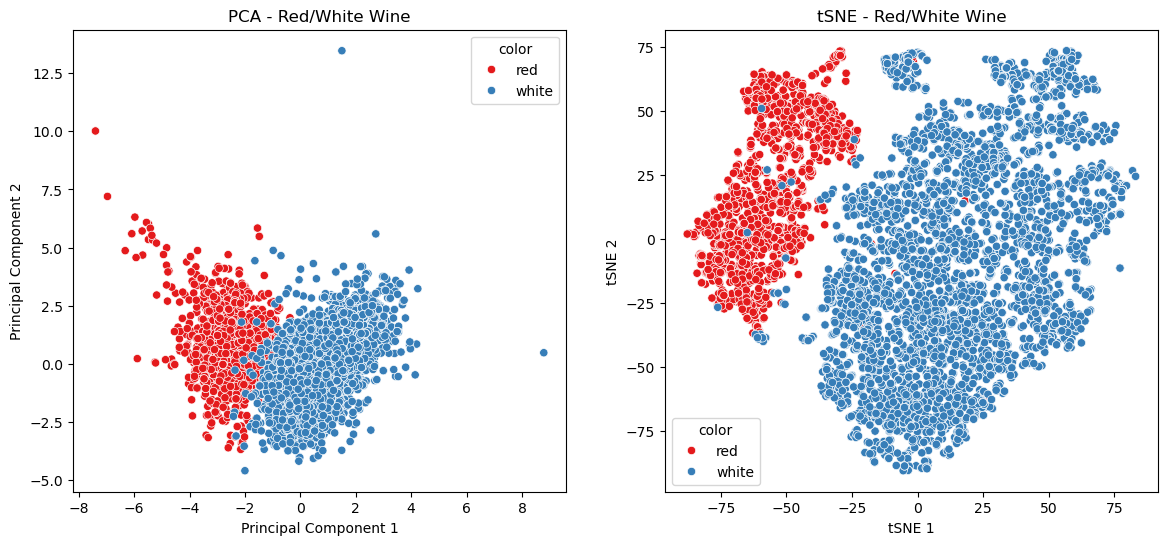

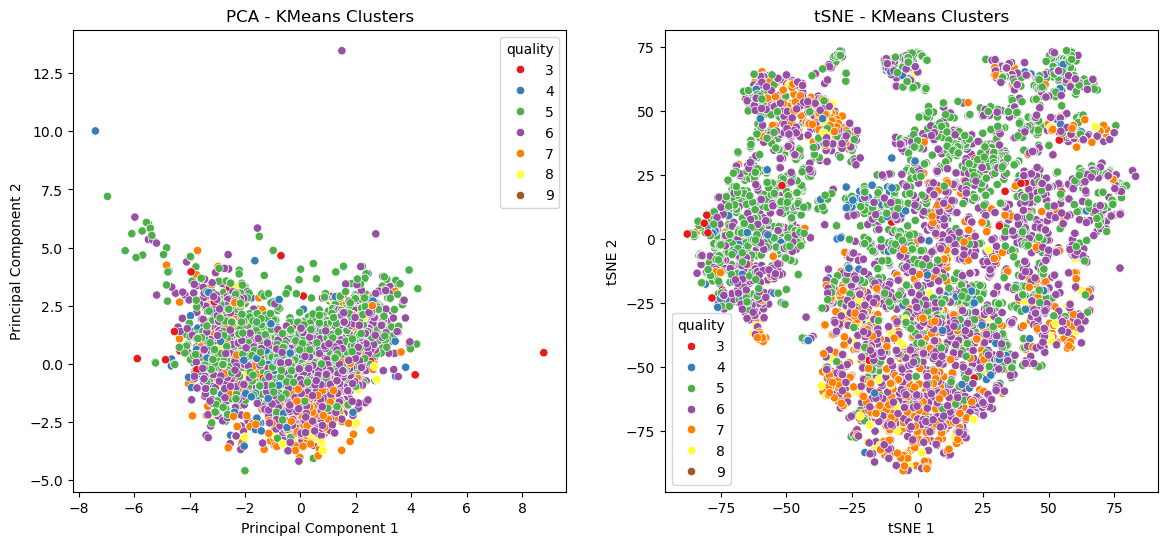

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('wine.csv')

# Separate the features and labels
features = df.iloc[:, :-2]  # Assuming the last two columns are 'red/white' and 'quality'
labels_red_white = df.iloc[:, -2]  # Red/White labels
labels_quality = df.iloc[:, -1]    # Quality scores

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
print(f'Explained variance by components: {pca.explained_variance_ratio_}')

# tSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Plot PCA Results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['color'], palette="Set1")
plt.title('PCA - Red/White Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot tSNE Results
plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['color'], palette="Set1")
plt.title('tSNE - Red/White Wine')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.show()

# Plot Clusters on PCA
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['quality'], palette="Set1")
plt.title('PCA - KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot Clusters on tSNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['quality'], palette="Set1")
plt.title('tSNE - KMeans Clusters')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.show()

# Optional: Quality Analysis (PCA)


## Summary of Findings

1. **PCA Results:**
   - The first two principal components in PCA capture a significant portion of the variance and effectively distinguish red from white wines, forming distinct clusters.
   
2. **tSNE Results:**
   - tSNE shows even clearer separation between red and white wines than PCA, making it particularly effective for this dataset.
   
3. **K-Means Clustering:**
   - K-Means clustering aligns well with red/white labels, confirming its ability to differentiate based on wine color. However, it is less effective at distinguishing wine quality, suggesting that quality is not as closely linked to the chemical properties.

## Conclusion

- **Dimensionality Reduction:** tSNE is the most effective technique for separating red and white wines in this dataset.
- **Clustering and Quality:** K-Means clustering effectively classifies wine color but struggles with distinguishing quality based solely on chemical properties.